In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('BMW sales data.csv')


In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


<Axes: xlabel='Model', ylabel='Sales_Volume'>

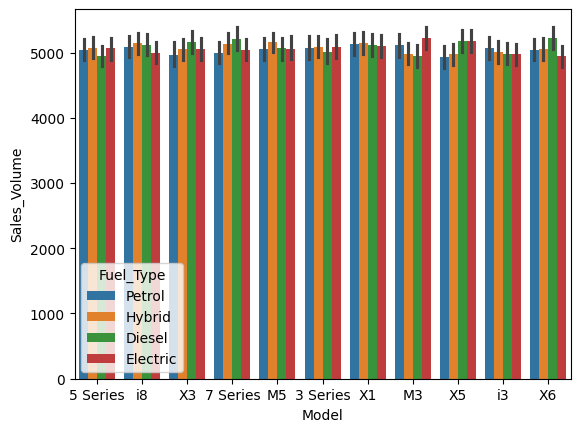

In [6]:
import seaborn as sns
sns.barplot(data=df, x = 'Model', y = 'Sales_Volume', hue = 'Fuel_Type')

In [7]:
df_fe = df.copy()

In [8]:
print(df_fe.shape)

(50000, 11)


In [9]:
print(df_fe.info())
print(df_fe.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engin

In [10]:
df_fe['Car_Age'] = 2024 - df_fe['Year']

In [11]:
df_fe = df_fe.sort_values(['Model','Year'])
df_fe['Montly_Sales_Growth'] = df_fe.groupby('Model')['Sales_Volume'].pct_change().fillna(0)

In [12]:
df_fe['Year_cat'] = df_fe['Year'].astype(str)

In [13]:
df_fe['Region_Mean_Sale'] = df_fe.groupby('Region')['Sales_Volume'].transform('mean')

In [14]:
df_fe['Region_Sales_Index'] = df_fe['Sales_Volume'] / df_fe['Region_Mean_Sale']

In [15]:
df_fe[['Region', 'Sales_Volume', 'Region_Mean_Sale', 'Region_Sales_Index']].head(10)


,Region,Sales_Volume,Region_Mean_Sale,Region_Sales_Index
146,Asia,8650,5083.306955,1.701648
663,Africa,8248,5036.380952,1.637684
739,North America,6364,5087.298020,1.250959
929,North America,7885,5087.298020,1.549939
957,Middle East,6039,5055.131972,1.194628
1271,Middle East,4167,5055.131972,0.824311
1590,North America,9869,5087.298020,1.939930
1598,Europe,7751,5106.208063,1.517956
1692,North America,280,5087.298020,0.055039
1730,North America,9482,5087.298020,1.863858


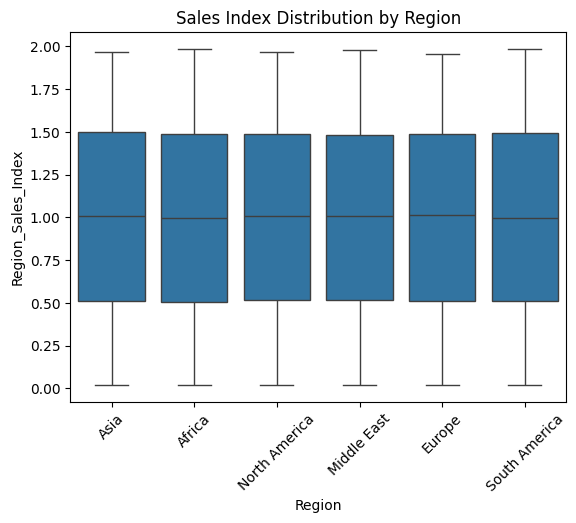

In [17]:
sns.boxplot(data=df_fe, x='Region', y='Region_Sales_Index')
plt.title('Sales Index Distribution by Region')
plt.xticks(rotation=45)
plt.show()


In [18]:
top_models = (
    df_fe.groupby(['Region', 'Model'])['Region_Sales_Index']
    .mean()
    .reset_index()
    .sort_values(['Region', 'Region_Sales_Index'], ascending=[True, False])
)
top_models.groupby('Region').head(3)


,Region,Model,Region_Sales_Index
0,Africa,3 Series,1.020998
6,Africa,X3,1.016604
5,Africa,X1,1.015563
11,Asia,3 Series,1.016246
16,Asia,X1,1.010682
17,Asia,X3,1.007801
26,Europe,M5,1.027369
22,Europe,3 Series,1.015069
29,Europe,X5,1.014445
36,Middle East,M3,1.039950


In [19]:
df_fe[['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Region_Sales_Index']].corr()


,Engine_Size_L,Mileage_KM,Price_USD,Region_Sales_Index
Engine_Size_L,1.000000,-0.004906,0.000146,-0.003888
Mileage_KM,-0.004906,1.000000,-0.004238,0.001392
Price_USD,0.000146,-0.004238,1.000000,0.000038
Region_Sales_Index,-0.003888,0.001392,0.000038,1.000000


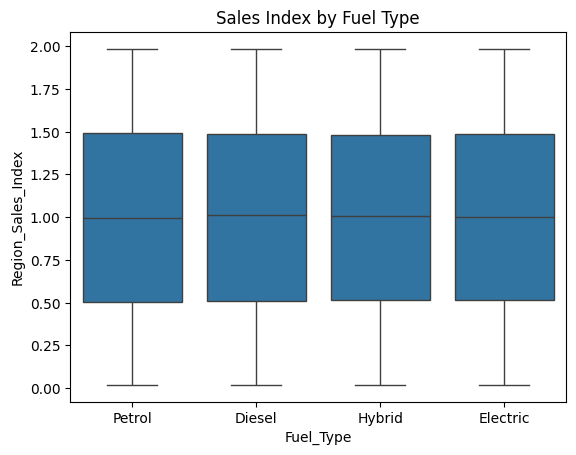

In [20]:
import seaborn as sns
sns.boxplot(data=df_fe, x='Fuel_Type', y='Region_Sales_Index')
plt.title('Sales Index by Fuel Type')
plt.show()


In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = pd.get_dummies(df_fe[['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Fuel_Type', 'Transmission']], drop_first=True)
# Convert boolean columns to integers
X = X.astype(int)
y = df_fe['Region_Sales_Index']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Region_Sales_Index   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3053
Date:                Sun, 26 Oct 2025   Prob (F-statistic):              0.952
Time:                        10:12:54   Log-Likelihood:                -42286.
No. Observations:               50000   AIC:                         8.459e+04
Df Residuals:                   49992   BIC:                         8.466e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0084    

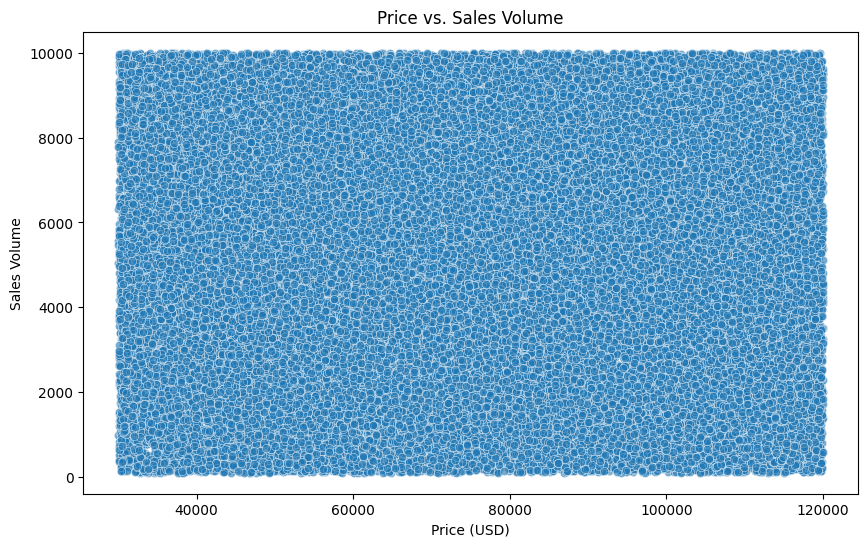

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fe, x='Price_USD', y='Sales_Volume', alpha=0.6)
plt.title('Price vs. Sales Volume')
plt.xlabel('Price (USD)')
plt.ylabel('Sales Volume')
plt.show()

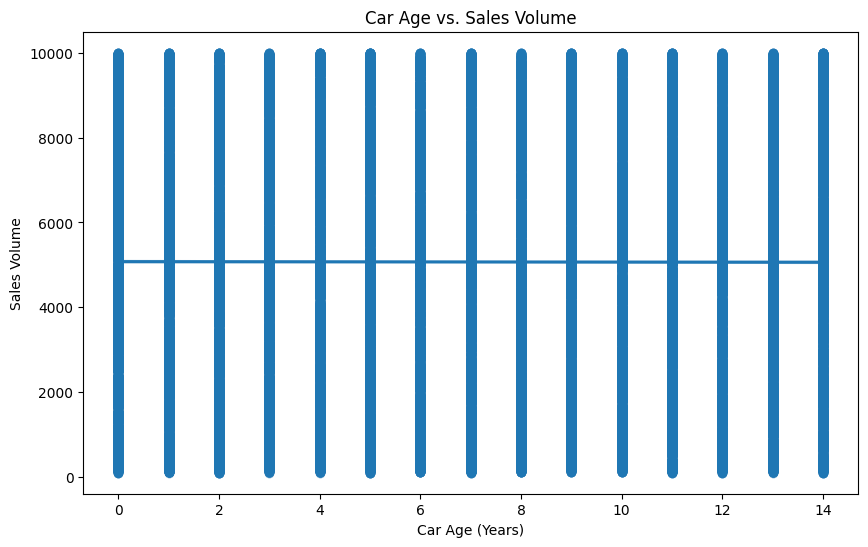

In [30]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_fe, x='Car_Age', y='Sales_Volume', scatter_kws={'alpha':0.6})
plt.title('Car Age vs. Sales Volume')
plt.xlabel('Car Age (Years)')
plt.ylabel('Sales Volume')
plt.show()

In [31]:
df_fe.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age,Montly_Sales_Growth,Year_cat,Region_Mean_Sale,Region_Sales_Index
146,3 Series,2010,Asia,Black,Petrol,Manual,2.1,107572,86660,8650,High,14,0.000000,2010,5083.306955,1.701648
663,3 Series,2010,Africa,Red,Diesel,Automatic,4.1,123015,105114,8248,High,14,-0.046474,2010,5036.380952,1.637684
739,3 Series,2010,North America,Black,Diesel,Automatic,1.8,172040,45092,6364,Low,14,-0.228419,2010,5087.298020,1.250959
929,3 Series,2010,North America,Silver,Hybrid,Manual,2.5,136265,98452,7885,High,14,0.239001,2010,5087.298020,1.549939
957,3 Series,2010,Middle East,Blue,Diesel,Automatic,1.7,149295,109920,6039,Low,14,-0.234115,2010,5055.131972,1.194628


In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
df_corr = df_fe[['Sales_Classification', 'Car_Age', 'Sales_Volume']].copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Sales_Classification'
df_corr['Sales_Classification_Encoded'] = label_encoder.fit_transform(df_corr['Sales_Classification'])

# Calculate the correlation matrix
correlation_matrix = df_corr[['Sales_Classification_Encoded', 'Car_Age', 'Sales_Volume']].corr()

# Display the correlation matrix
display(correlation_matrix)

,Sales_Classification_Encoded,Car_Age,Sales_Volume
Sales_Classification_Encoded,1.000000,0.005391,-0.795238
Car_Age,0.005391,1.000000,-0.001671
Sales_Volume,-0.795238,-0.001671,1.000000


/tmp/ipython-input-3069412862.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engine_sales, x='Engine_Size_L', y='Sales_Volume', palette='viridis')


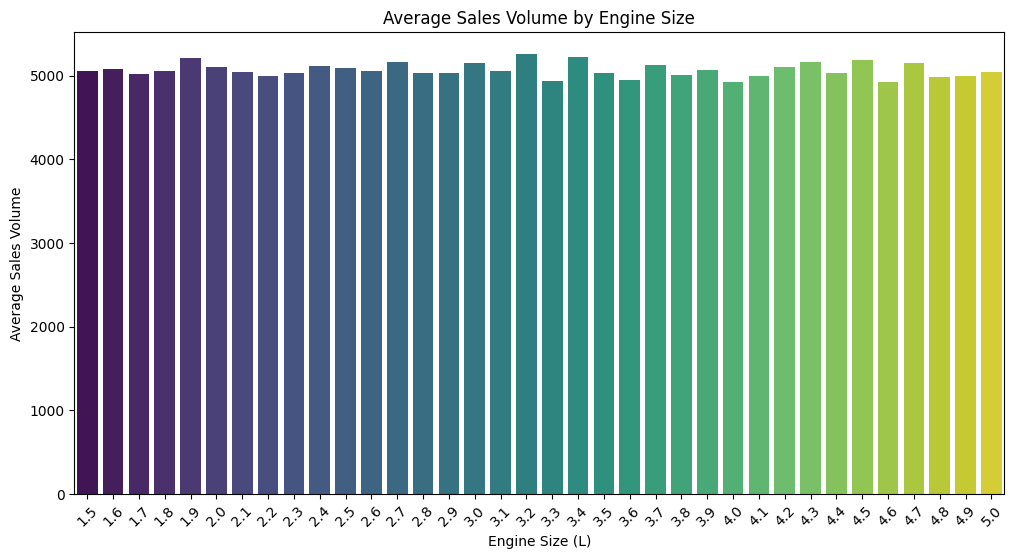

In [35]:
# Group by Engine_Size_L and calculate the mean Sales_Volume
engine_sales = df_fe.groupby('Engine_Size_L')['Sales_Volume'].mean().reset_index()

# Sort by Sales_Volume to easily see which engine sizes have the highest sales
engine_sales = engine_sales.sort_values('Sales_Volume', ascending=False)

# Plot the average sales volume by engine size
plt.figure(figsize=(12, 6))
sns.barplot(data=engine_sales, x='Engine_Size_L', y='Sales_Volume', palette='viridis')
plt.title('Average Sales Volume by Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average Sales Volume')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Define the engine sizes of interest
engine_sizes_of_interest = [1.9, 2.7, 3.2, 3.4]

# Filter the DataFrame for rows with these engine sizes
models_with_specific_engines = df_fe[df_fe['Engine_Size_L'].isin(engine_sizes_of_interest)]

# Get the unique models from the filtered DataFrame
unique_models = models_with_specific_engines['Model'].unique()

# Print the unique models
print("Models featuring engine sizes 1.9L, 2.7L, 3.2L, and 3.4L:")
print(unique_models)

Models featuring engine sizes 1.9L, 2.7L, 3.2L, and 3.4L:
['3 Series' '5 Series' '7 Series' 'M3' 'M5' 'X1' 'X3' 'X5' 'X6' 'i3' 'i8']


In [39]:
# Define the list of models identified
models_of_interest = ['3 Series', '5 Series', '7 Series', 'M3', 'M5', 'X1', 'X3', 'X5', 'X6', 'i3', 'i8']

# Filter the DataFrame for rows with these models
sales_of_specific_models = df_fe[df_fe['Model'].isin(models_of_interest)]

# Group by Model and calculate the mean Sales_Volume
average_sales_by_model = sales_of_specific_models.groupby('Model')['Sales_Volume'].mean().reset_index()

# Sort by average Sales_Volume to see which of these models have the highest sales
average_sales_by_model = average_sales_by_model.sort_values('Sales_Volume', ascending=False)

# Display the average sales volume for these models
print("Average Sales Volume for Models featuring 1.9L, 2.7L, 3.2L, and 3.4L engine sizes:")
display(average_sales_by_model)

Average Sales Volume for Models featuring 1.9L, 2.7L, 3.2L, and 3.4L engine sizes:


,Model,Sales_Volume
5,X1,5121.676149
2,7 Series,5097.828118
4,M5,5087.022778
10,i8,5085.516934
0,3 Series,5066.660065
3,M3,5064.512576
7,X5,5061.232226
8,X6,5060.738276
6,X3,5057.933956
1,5 Series,5029.947517


In [41]:
# Group the filtered data by Model and Transmission and count the occurrences
transmission_distribution = sales_of_specific_models.groupby(['Model', 'Transmission']).size().reset_index(name='Count')

# Display the transmission distribution
print("Transmission distribution for models featuring 1.9L, 2.7L, 3.2L, and 3.4L engine sizes:")
display(transmission_distribution)

Transmission distribution for models featuring 1.9L, 2.7L, 3.2L, and 3.4L engine sizes:


,Model,Transmission,Count
0,3 Series,Automatic,2292
1,3 Series,Manual,2303
2,5 Series,Automatic,2303
3,5 Series,Manual,2289
4,7 Series,Automatic,2339
5,7 Series,Manual,2327
6,M3,Automatic,2205
7,M3,Manual,2208
8,M5,Automatic,2189
9,M5,Manual,2289
